INFO:nixtla.nixtla_client:Happy Forecasting! :)


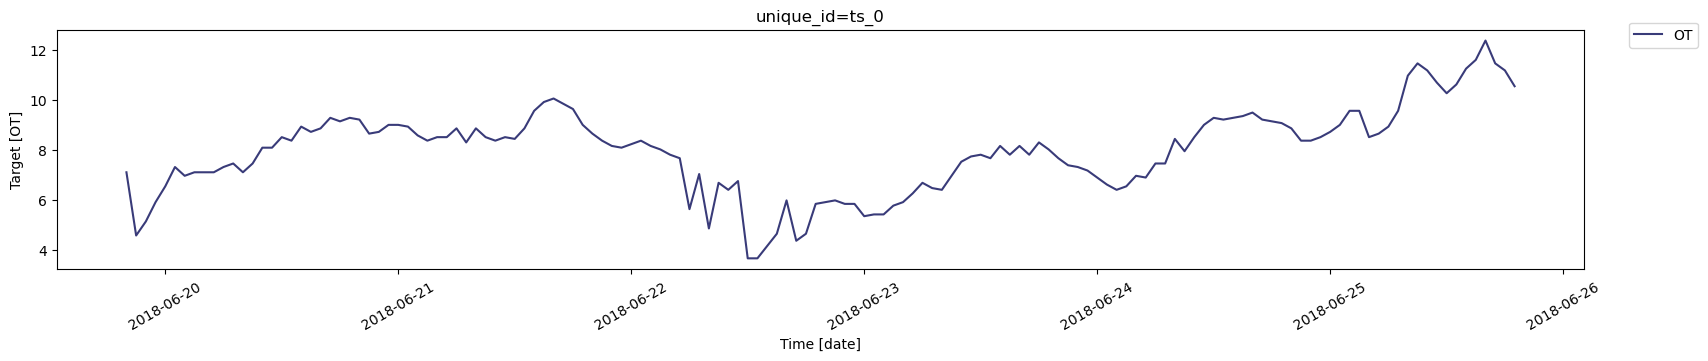

In [8]:
import pandas as pd
from nixtla import NixtlaClient 
import matplotlib.pyplot as plt
nixtla_client = NixtlaClient(
    api_key = 'nixak-F2OXoWNmAp26uEBqVLxhYiOUWIIPB20lvSCb3xMVK19Kffm7BqDvho712Mfynz8TuA14ove7gI8Jwsfg'
)
nixtla_client.validate_api_key()

df = pd.read_csv('dataset/ETTh1_test.csv')#'https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv'
df.head()

train_s = df[1:145]
test_s= df[145:]

train_l = df[-1176:-168]
test_l= df[-168:]

nixtla_client.plot(train_s,time_col='date',target_col='OT') #time_col='timestamp', target_col='value'

In [3]:
timegpt_fcst_hist_ex_vars_df = nixtla_client.forecast(
    df=train_s, 
    h=24,
    level=[80,90],
    time_col='date',
    target_col='OT',
    hist_exog_list=['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL'],
)
timegpt_fcst_hist_ex_vars_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,date,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,2018-06-25 20:00:00,10.574358,10.690620,10.705153,10.458096,10.443563
1,2018-06-25 21:00:00,10.605498,11.000791,11.050202,10.210206,10.160794
2,2018-06-25 22:00:00,10.669927,10.990370,11.030425,10.349483,10.309428
3,2018-06-25 23:00:00,10.775868,10.972026,10.996545,10.579711,10.555192
4,2018-06-26 00:00:00,10.824882,10.824953,10.824962,10.824812,10.824803


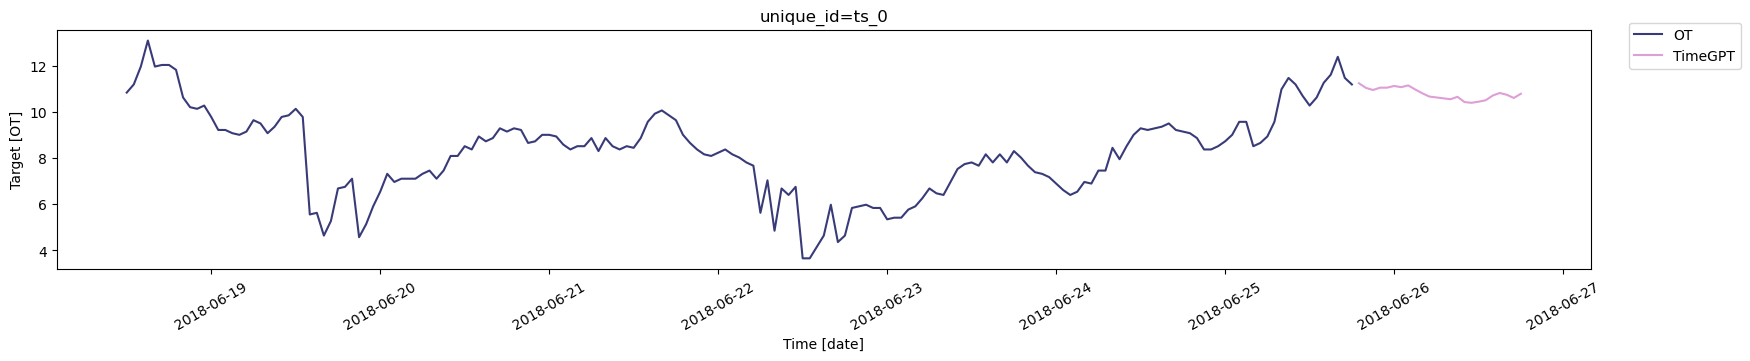

In [24]:
nixtla_client.plot(train_s, timegpt_fcst_hist_ex_vars_df, time_col='date', target_col='OT')

In [4]:
timegpt_long_fcst_hist_ex_vars_df = nixtla_client.forecast(
    df=train_l, 
    h=168,
    level=[90,95],
    time_col='date',
    target_col='OT',
    hist_exog_list=['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL'],
    model='timegpt-1-long-horizon',
)
timegpt_long_fcst_hist_ex_vars_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Using historical exogenous features: ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,date,TimeGPT,TimeGPT-hi-90,TimeGPT-hi-95,TimeGPT-lo-90,TimeGPT-lo-95
0,2018-06-19 20:00:00,6.941173,7.161106,7.173325,6.721239,6.709021
1,2018-06-19 21:00:00,6.999412,7.205698,7.217158,6.793125,6.781665
2,2018-06-19 22:00:00,7.007174,7.158781,7.167204,6.855568,6.847145
3,2018-06-19 23:00:00,6.974649,7.194811,7.207042,6.754487,6.742257
4,2018-06-20 00:00:00,6.938855,7.257796,7.275515,6.619915,6.602195


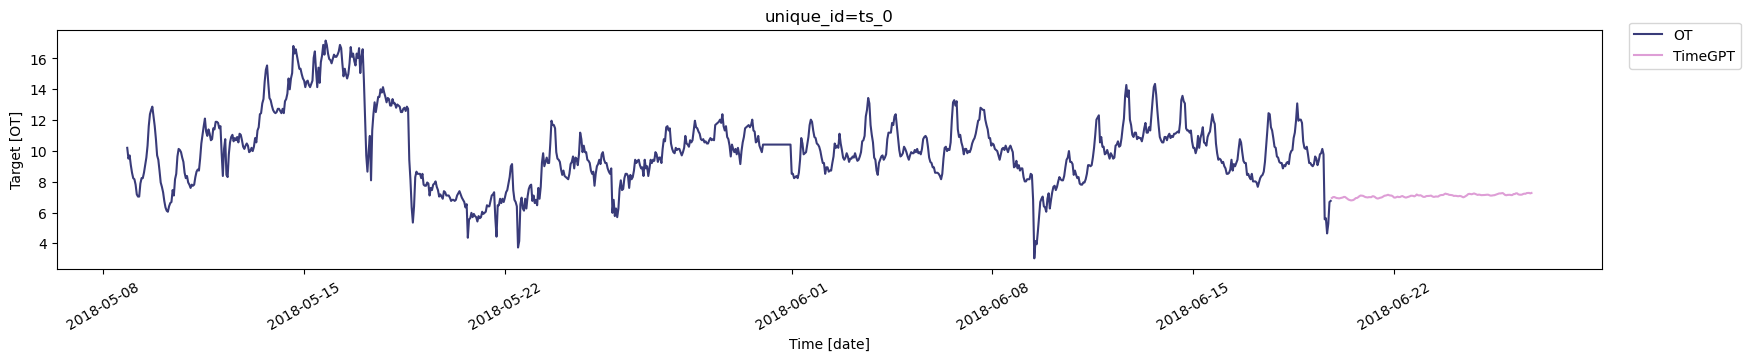

In [5]:
nixtla_client.plot(train_l, timegpt_long_fcst_hist_ex_vars_df, time_col='date', target_col='OT')

In [6]:
import numpy as np

def calculate_rmse(y_true, y_pred):
    """计算均方根误差（RMSE）"""
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def calculate_mae(y_true, y_pred):
    """计算平均绝对误差（MAE）"""
    return np.mean(np.abs(y_true - y_pred))

def calculate_smape(y_true, y_pred):
    """计算对称平均绝对百分比误差（SMAPE）"""
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def calculate_rae(y_true, y_pred):
    """计算相对绝对误差（RAE）"""
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

def evaluate_forecasts(y_true, y_pred):
    """评估预测结果"""
    rmse = calculate_rmse(y_true, y_pred)
    mae = calculate_mae(y_true, y_pred)
    smape = calculate_smape(y_true, y_pred)
    rae = calculate_rae(y_true, y_pred)
    
    return {
        'RMSE': rmse,
        'MAE': mae,
        'SMAPE': smape,
        'RAE': rae
    }

# 调用
if __name__ == "__main__":
    # 假设 y_true 和 y_pred 是 NumPy 数组，代表真实值和预测值
    y_true = test_s.iloc[:, -1].values
    y_pred = timegpt_fcst_hist_ex_vars_df.iloc[:,1].values 
    #y_true = test_l.iloc[:, -1].values
    #y_pred = timegpt_long_fcst_hist_ex_vars_df.iloc[:,1].values
    metrics = evaluate_forecasts(y_true, y_pred)
    print(y_true)
    print(y_pred)
    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

[ 9.98900032  9.98900032  9.56700039  9.42599964  9.70800018  9.63799953
  9.77799988  9.56700039  9.42599964  9.28600025  9.28600025  9.63799953
  9.42599964  9.07499981  8.93400002  9.21500015  9.21500015  9.42599964
 10.19999981 10.90400028 11.04399967 10.27099991  9.77799988  9.56700039]
[10.574358  10.605498  10.669927  10.775868  10.8248825 10.876026
 10.838685  10.727245  10.601087  10.485117  10.395361  10.368126
 10.300362  10.303005  10.223844  10.222142  10.271428  10.296316
 10.348478  10.455322  10.401812  10.274042  10.259996  10.265672 ]
Evaluation Metrics:
RMSE: 0.9525
MAE: 0.8831
SMAPE: 8.8172
RAE: 2.3399
